In [1]:
from skimage.morphology import disk
from skimage import data, exposure, filters, transform
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from scipy.ndimage import zoom, binary_dilation

## Autonomous work 1

Improve the detection of the letter "e". You can do this by not using thresholding on the image, instead highlighting edges or increasing contrast, and then finding the correct threshold value.

In [2]:
# Convolution Kernels
laplace_1_kernel = np.array([[0, 1, 0],
                             [1, -4, 1],
                             [0, 1, 0]])

laplace_2_kernel = np.ones((3, 3))
laplace_2_kernel[1, 1] = -8

roberts_1_kernel = np.array([[1, 0],
                             [0, -1]])

roberts_2_kernel = np.array([[0, 1],
                             [-1, 0]])

sobel_1_kernel = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
sobel_2_kernel = np.array([[0, 1, 2], [-1, 0, 1], [-1, -2, 0]])

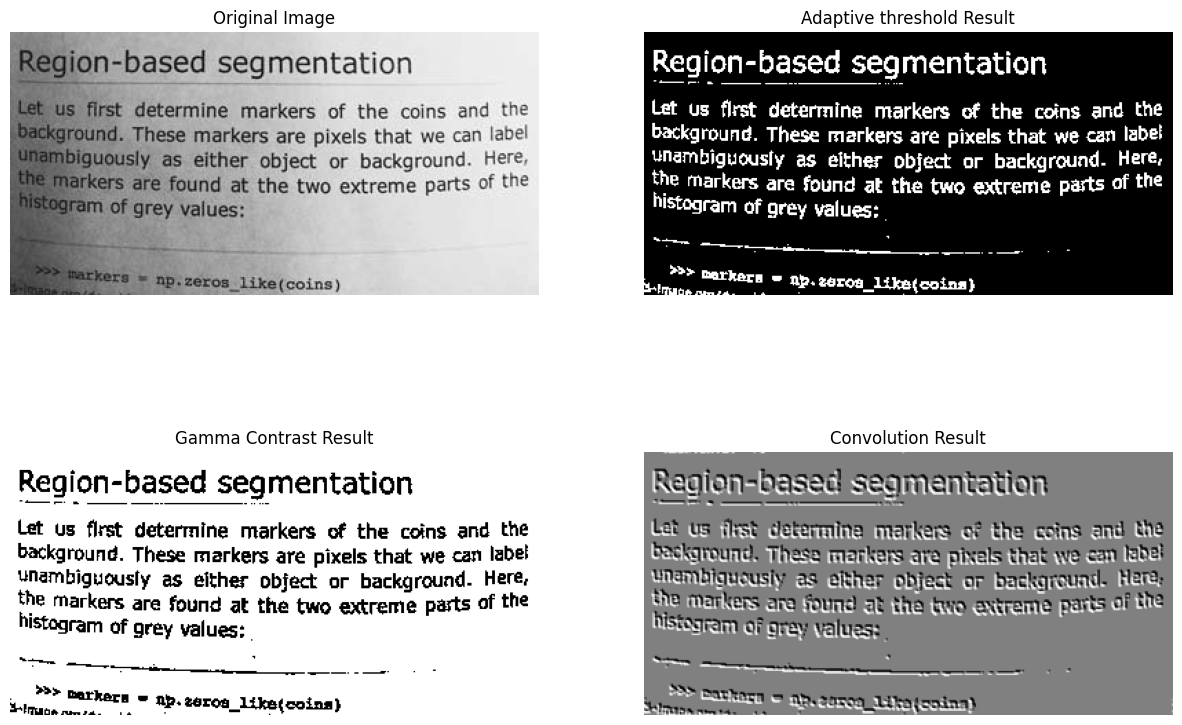

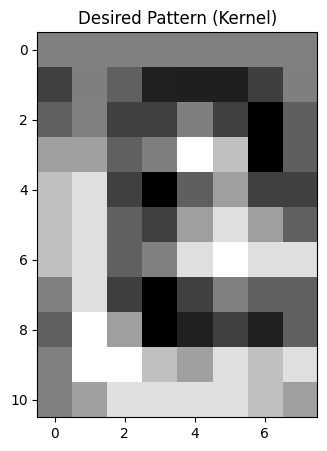

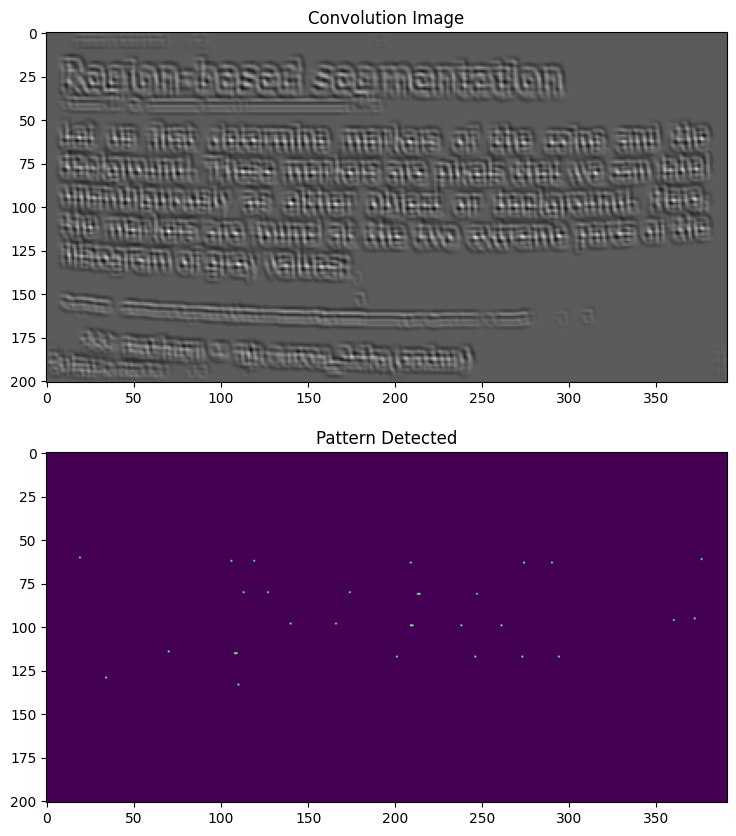

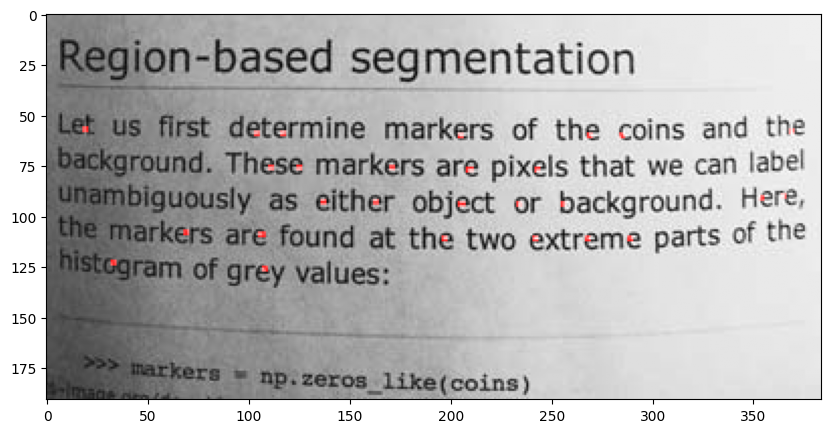

In [44]:
img_page = data.page()

# Adaptive thresholds
s_elem = disk(20)
img_page_float = img_page / 255
I_filt = filters.rank.mean(img_page_float, footprint=s_elem) / 255
img_with_text = (img_page_float - I_filt) < -0.05

# Contrast
img_with_contrast = exposure.adjust_gamma(img_with_text, 1.2)
img_with_contrast = exposure.equalize_adapthist(img_with_text) < 0.35

# Convolution
img_with_conv = signal.convolve2d(img_with_contrast, sobel_2_kernel, mode='same', boundary='wrap')

# Display images
plt.figure(figsize=(15, 10))
plt.subplot(221)
plt.imshow(img_page, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Plot the result of Adaptive threshold
plt.subplot(222)
plt.imshow(img_with_text, cmap='gray')
plt.title('Adaptive threshold Result')
plt.axis('off')

# Plot the result of Contrast
plt.subplot(223)
plt.imshow(img_with_contrast, cmap='gray')
plt.title("Gamma Contrast Result")
plt.axis('off')

# Plot the result of Convolution
plt.subplot(224)
plt.imshow(img_with_conv, cmap='gray')
plt.title("Convolution Result")
plt.axis('off')

# Kernal for detection letter 'e'
kernel = transform.rotate(img_with_conv[104:115, 63:71], 180)

plt.figure(figsize=(10, 5))
plt.title("Desired Pattern (Kernel)")
plt.imshow(transform.rotate(kernel, 180), cmap='gray')

# Create a new figure with subplots
out = signal.convolve2d(img_with_conv.astype(float), kernel)

plt.figure(figsize=(15, 10))
plt.subplot(211)
plt.title("Convolution Image")
plt.imshow(out, cmap='gray')

feature_location_mask = out > 0.75 * np.max(out)
plt.subplot(212)
plt.title("Pattern Detected")
plt.imshow(feature_location_mask)

# Perform dilation to increase areas
plt.figure(figsize=(10,30))
if feature_location_mask.shape != img_page.shape:
    feature_location_mask = zoom(feature_location_mask, (img_page.shape[0] / feature_location_mask.shape[0], img_page.shape[1] / feature_location_mask.shape[1]), order=0)

dilated_image = binary_dilation(feature_location_mask, structure=np.ones((3, 3)))
red_mask = np.dstack([dilated_image, np.zeros(feature_location_mask.shape),np.zeros(feature_location_mask.shape)])
plt.imshow(red_mask + np.dstack([img_page,img_page,img_page])/255)

## Autonomous work 2

Select one coin on the *coins* image and write a script that uses convolutional operations to find the coin based on a pattern defined by you.

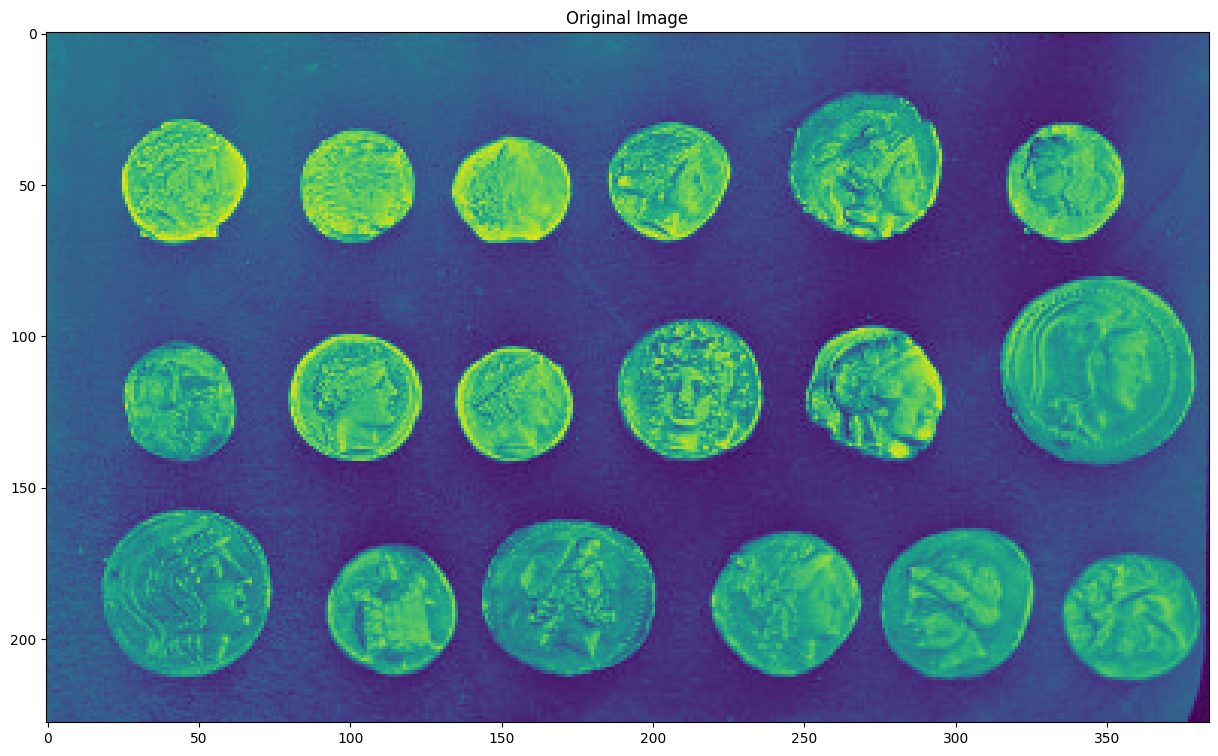

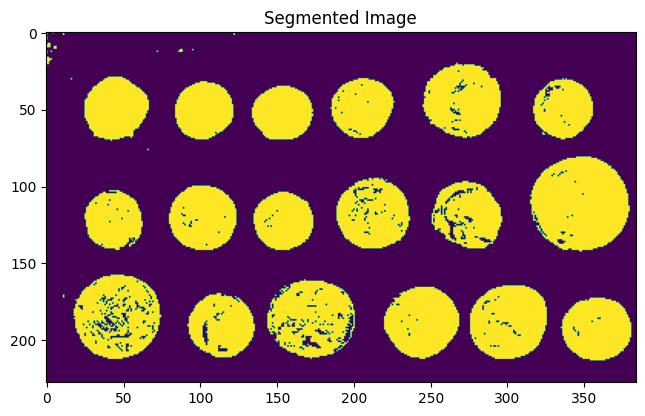

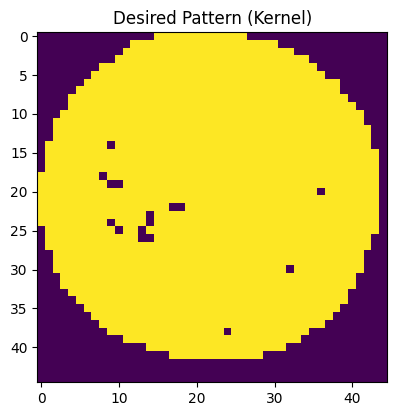

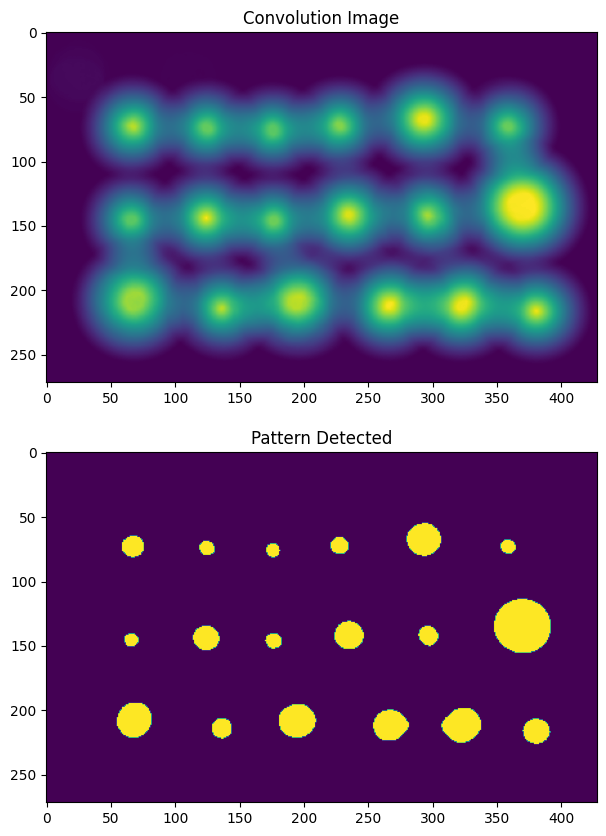

In [30]:
coins = data.coins()
coins = coins[75:, :]

# Plot the original image
plt.figure(figsize=(15, 10))
plt.imshow(coins)
plt.title("Original Image")

# Thresholding
seg_coins = coins > 105

# Display the segmented image
plt.figure(figsize=(15, 10))
plt.subplot(211)
plt.title("Segmented Image")
plt.imshow(seg_coins)

# Create the kernel
kernel = transform.rotate(seg_coins[100:145, 80:125], 180)

# Plots
plt.figure(figsize=(15, 10))
plt.subplot(212)
plt.title("Desired Pattern (Kernel)")
plt.imshow(transform.rotate(kernel, 180))

plt.figure(figsize=(15, 10))
plt.subplot(211)
out = signal.convolve2d(seg_coins.astype(float), kernel)
plt.title("Convolution Image")
plt.imshow(out)

plt.subplot(212)
plt.title("Pattern Detected")
feature_location_mask = out > 0.7 * np.max(out)
plt.imshow(feature_location_mask)

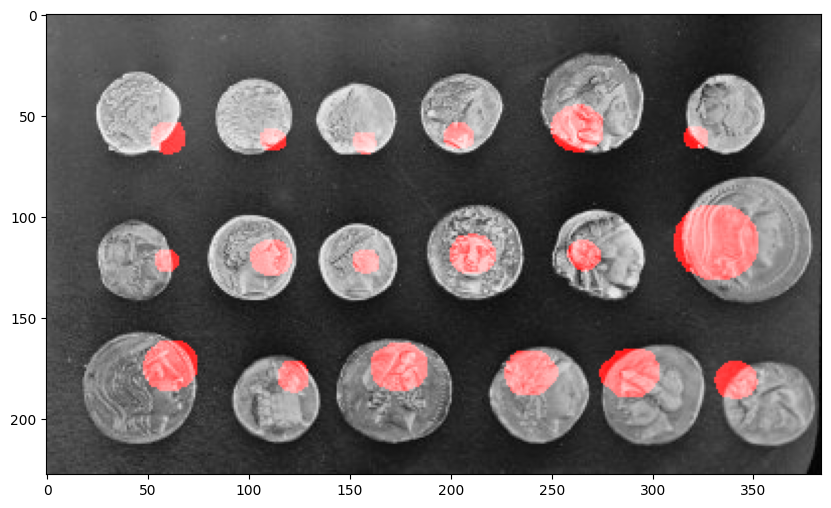

In [31]:
# Perform dilation to increase areas
plt.figure(figsize=(10,30))
if feature_location_mask.shape != coins.shape:
    feature_location_mask = zoom(feature_location_mask, (coins.shape[0] / feature_location_mask.shape[0], coins.shape[1] / feature_location_mask.shape[1]), order=0)

dilated_image = binary_dilation(feature_location_mask, structure=np.ones((3, 3)))
red_mask = np.dstack([dilated_image, np.zeros(feature_location_mask.shape),np.zeros(feature_location_mask.shape)])
plt.imshow(red_mask + np.dstack([coins,coins,coins])/255)